# Практическое задание к уроку 2. Keras

Используя файл Web2.ipynb (он в полезных ссылках):

Возьмите набор примеров fashion-MNIST

1. Опишите - какой результат нейросети получен в зависимости от:  
a. числа нейронов в слое (для 2-х слойной сети),  
b. числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число   тренируемых параметров).  
c. фиксируйте для тренировочного и тестового набора метрики accuracy.  

2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [25]:
import keras
keras.__version__

'2.5.0'

In [26]:
keras.backend.backend()

'tensorflow'

In [27]:
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
import numpy as np

(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


Label is 8


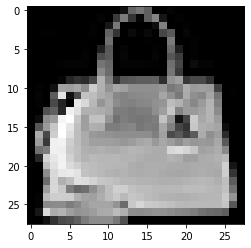

In [28]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

In [29]:
X_train.min(), X_train.max()

(0, 255)

In [30]:
# Нормировка
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [31]:
# Вытягивание признаков
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [32]:
from keras.layers import Dense
from keras.models import Sequential

# define the keras model
model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    # Dense(32, activation='relu'),
    Dense(10, activation='sigmoid'),
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [34]:
y_train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [35]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, 
                    validation_split=0.2)

Epoch 1/5
4800/4800 [==============================] - 11s 936us/step - loss: 0.9265 - accuracy: 0.6848 - val_loss: 0.4692 - val_accuracy: 0.8370
Epoch 2/5
4800/4800 [==============================] - 4s 843us/step - loss: 0.4654 - accuracy: 0.8380 - val_loss: 0.4280 - val_accuracy: 0.8472
Epoch 3/5
4800/4800 [==============================] - 4s 840us/step - loss: 0.4207 - accuracy: 0.8509 - val_loss: 0.4357 - val_accuracy: 0.8392
Epoch 4/5
4800/4800 [==============================] - 4s 826us/step - loss: 0.3826 - accuracy: 0.8627 - val_loss: 0.3873 - val_accuracy: 0.8608
Epoch 5/5
4800/4800 [==============================] - 4s 817us/step - loss: 0.3604 - accuracy: 0.8715 - val_loss: 0.3918 - val_accuracy: 0.8589


## 1.a Исследование влияния числа нейронов в слое (для 2-х слойной сети) на метрики качества

In [62]:
import pandas as pd

results = []
for close_layer_neurons in [32, 64, 128]:
    # define the keras model
    test_model = Sequential([
        Dense(close_layer_neurons, input_shape=(28 * 28,), activation='relu'),
        # Dense(32, activation='relu'),
        Dense(10, activation='sigmoid'),
    ])
    test_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
    history = test_model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10,
                    validation_split=0.2)
    results.append(pd.DataFrame(history.history))

Epoch 1/5
4800/4800 [==============================] - 7s 1ms/step - loss: 0.6863 - accuracy: 0.7649 - val_loss: 0.4462 - val_accuracy: 0.8428
Epoch 2/5
4800/4800 [==============================] - 5s 955us/step - loss: 0.4176 - accuracy: 0.8530 - val_loss: 0.4116 - val_accuracy: 0.8583
Epoch 3/5
4800/4800 [==============================] - 5s 959us/step - loss: 0.3746 - accuracy: 0.8647 - val_loss: 0.4374 - val_accuracy: 0.8401
Epoch 4/5
4800/4800 [==============================] - 4s 930us/step - loss: 0.3461 - accuracy: 0.8747 - val_loss: 0.4079 - val_accuracy: 0.8557
Epoch 5/5
4800/4800 [==============================] - 4s 919us/step - loss: 0.3328 - accuracy: 0.8801 - val_loss: 0.3768 - val_accuracy: 0.8661
Epoch 1/5
4800/4800 [==============================] - 6s 1ms/step - loss: 0.6385 - accuracy: 0.7786 - val_loss: 0.4058 - val_accuracy: 0.8566
Epoch 2/5
4800/4800 [==============================] - 5s 966us/step - loss: 0.3912 - accuracy: 0.8572 - val_loss: 0.3690 - val_accura

In [81]:
results_comparation = pd.DataFrame({
    'neurons': [32, 64, 128],
    'loss': [float(result['loss'][-1:]) for result in results],
    'accuracy': [float(result['accuracy'][-1:]) for result in results],
    'val_loss': [float(result['val_loss'][-1:]) for result in results],
    'val_accuracy': [float(result['val_accuracy'][-1:]) for result in results]
})
results_comparation

,neurons,loss,accuracy,val_loss,val_accuracy
0,32,0.336695,0.878250,0.376793,0.866083
1,64,0.305515,0.886375,0.341733,0.876500
2,128,0.297865,0.889146,0.332351,0.882833


**Наблюдаем, что результаты моделей немного улучшаются при увеличении количества нейронов скрытого слоя**

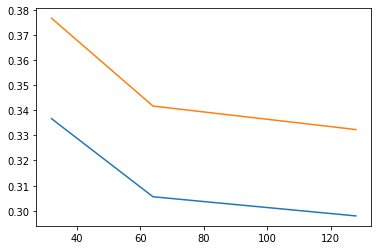

In [84]:
plt.plot(results_comparation['neurons'], results_comparation['loss'])
plt.plot(results_comparation['neurons'], results_comparation['val_loss'])

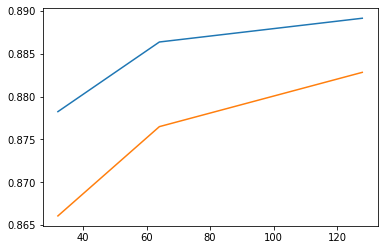

In [86]:
plt.plot(results_comparation['neurons'], results_comparation['accuracy'])
plt.plot(results_comparation['neurons'], results_comparation['val_accuracy'])

## 1.b Исследование влияния числа слоев на метрики качества

In [88]:
layernum_results = []

layer_arrays = [
    [
        Dense(64, input_shape=(28 * 28,), activation='relu'),
        Dense(10, activation='sigmoid'),
    ],
    [
        Dense(64, input_shape=(28 * 28,), activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='sigmoid'),
    ],
    [
        Dense(64, input_shape=(28 * 28,), activation='relu'),
        Dense(32, activation='relu'),
        Dense(24, activation='relu'),
        Dense(12, activation='relu'),
        Dense(10, activation='sigmoid'),
    ],
    [
        Dense(64, input_shape=(28 * 28,), activation='relu'),
        Dense(32, activation='relu'),
        Dense(24, activation='relu'),
        Dense(12, activation='relu'),
        Dense(12, activation='relu'),
        Dense(12, activation='relu'),
        Dense(12, activation='relu'),
        Dense(12, activation='relu'),
        Dense(12, activation='relu'),
        Dense(10, activation='sigmoid'),
    ]
]

for layers in layer_arrays:
    # define the keras model
    test_model = Sequential(layers)
    test_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
    history = test_model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10,
                    validation_split=0.2)
    layernum_results.append(pd.DataFrame(history.history))

Epoch 1/5
4800/4800 [==============================] - 5s 954us/step - loss: 0.6458 - accuracy: 0.7775 - val_loss: 0.4279 - val_accuracy: 0.8448
Epoch 2/5
4800/4800 [==============================] - 4s 904us/step - loss: 0.3928 - accuracy: 0.8593 - val_loss: 0.4117 - val_accuracy: 0.8510
Epoch 3/5
4800/4800 [==============================] - 4s 910us/step - loss: 0.3581 - accuracy: 0.8692 - val_loss: 0.3756 - val_accuracy: 0.8661
Epoch 4/5
4800/4800 [==============================] - 4s 890us/step - loss: 0.3326 - accuracy: 0.8772 - val_loss: 0.3751 - val_accuracy: 0.8636
Epoch 5/5
4800/4800 [==============================] - 4s 890us/step - loss: 0.3047 - accuracy: 0.8865 - val_loss: 0.3647 - val_accuracy: 0.8696
Epoch 1/5
4800/4800 [==============================] - 5s 967us/step - loss: 0.6559 - accuracy: 0.7712 - val_loss: 0.4215 - val_accuracy: 0.8479
Epoch 2/5
4800/4800 [==============================] - 4s 923us/step - loss: 0.3974 - accuracy: 0.8542 - val_loss: 0.3809 - val_ac

**Наблюдаем, что результаты моделей немного улучшаются при увеличении количества слоев до 3-х. Но при увеличении количества до более чем 3-х слоев качество метрики на валидационной сборке падает** 

In [89]:
layernum_range_results_comparation = pd.DataFrame({
    'layers': [2, 3, 5, 10],
    'loss': [float(layernum_result['loss'][-1:]) for layernum_result in layernum_results],
    'accuracy': [float(layernum_result['accuracy'][-1:]) for layernum_result in layernum_results],
    'val_loss': [float(layernum_result['val_loss'][-1:]) for layernum_result in layernum_results],
    'val_accuracy': [float(layernum_result['val_accuracy'][-1:]) for layernum_result in layernum_results]
})
layernum_range_results_comparation

,layers,loss,accuracy,val_loss,val_accuracy
0,2,0.310224,0.886521,0.364683,0.869583
1,3,0.317377,0.882187,0.338194,0.878583
2,5,0.327147,0.881000,0.359120,0.874000
3,10,0.368504,0.868208,0.400012,0.865833


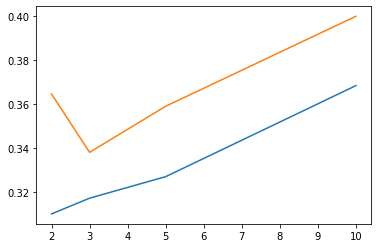

In [91]:
plt.plot(layernum_range_results_comparation['layers'], layernum_range_results_comparation['loss'])
plt.plot(layernum_range_results_comparation['layers'], layernum_range_results_comparation['val_loss'])

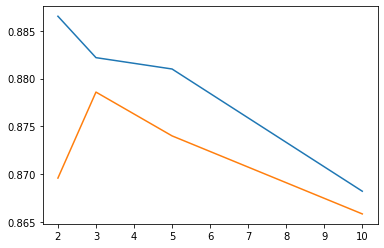

In [92]:
plt.plot(layernum_range_results_comparation['layers'], layernum_range_results_comparation['accuracy'])
plt.plot(layernum_range_results_comparation['layers'], layernum_range_results_comparation['val_accuracy'])

## 2. Сравнение методов оптимизации

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7952 - accuracy: 0.7287 - val_loss: 0.6130 - val_accuracy: 0.7760
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5121 - accuracy: 0.8216 - val_loss: 0.5231 - val_accuracy: 0.8138
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4618 - accuracy: 0.8381 - val_loss: 0.4667 - val_accuracy: 0.8349
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4330 - accuracy: 0.8473 - val_loss: 0.4485 - val_accuracy: 0.8407
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4148 - accuracy: 0.8546 - val_loss: 0.4786 - val_accuracy: 0.8231
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3263 - accuracy: 0.5873 - val_loss: 0.9156 - val_accuracy: 0.6901
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8064 - accuracy: 0.7285 - val_loss: 0.7546 - val_accuracy: 0.7433

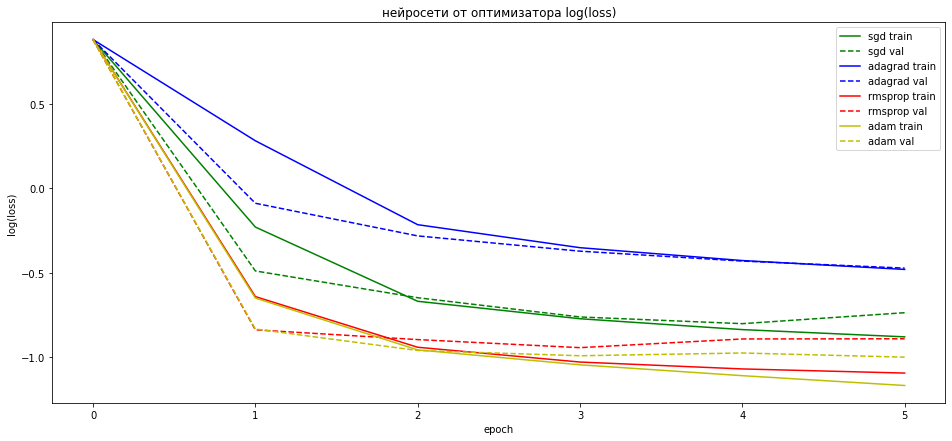

Wall time: 58.2 s


In [97]:
%%time

# создаем модель model
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(32, activation='relu'),
    Dense(10, activation='sigmoid'),
])

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model_weights.h5')

# будем сохранять модели в словарь
models = {}


plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r', 'y']

num_epochs = 5
batch_size = 32

# вектор для вывода результатов
epoch = np.arange(num_epochs+1)

# будем изменять оптимизаторы
for i, i_optim in enumerate(['sgd', 'adagrad', 'rmsprop', 'adam']):
    # создаем рабочую модель  model_i, куда будем загружать эти веса (она должна быть идентичной структуры)
    model_i = Sequential([
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(32, activation='relu'),
        Dense(10, activation='sigmoid'),
    ])
    
    # загружаем веса model_i.load_weights('model.h5')
    model_i.load_weights('model_weights.h5')
    
    # компилируем model_i с одним из оптимизаторов
    model_i.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    
    # вычисляем ошибку для modeli без обучения
    h0_train = model_i.evaluate(X_train, y_train, verbose=0)
    h0_val = model_i.evaluate(X_test, y_test, verbose=0)

    # проводим обучение модели 
    h = model_i.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)
    
    # записываем обученную модель в словарь
    models[i_optim] = model_i

    # картинки
    plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']),
             '-', c=colors[i],
             label=i_optim + ' train')
    plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']),
             '--', c=colors[i],
             label=i_optim + ' val')

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

**Наблюдаем, что adam показывает себя лучше как на тренировочной так и на валидационной выборках**

## 3. Улучшение качества сети

Заметный прирост качества удалось получить путем:  
1. Добавления одного слоя (общее число 3)  
2. Увеличения количества нейронов скрытого слоя  
3. Увеличения количества эпох  
4. Применения оптимизатора Adam  

## 4. Формирование матрицы ошибок по классам. Оценка качества модели по каждому классу отдельно (полнота, точность).

In [ ]:
from sklearn.metrics import confusion_matrix

In [105]:
y_pred = model_i.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_int = to_categorical(y_pred_class)

Confusion matrix for 0


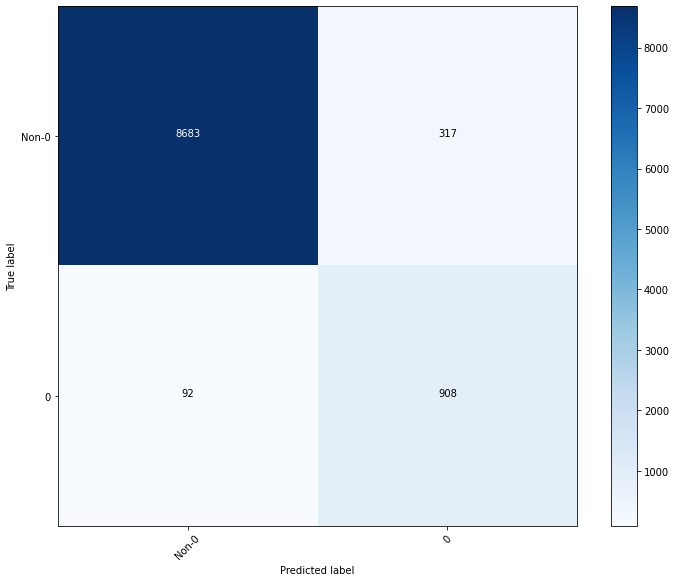

Confusion matrix for 1


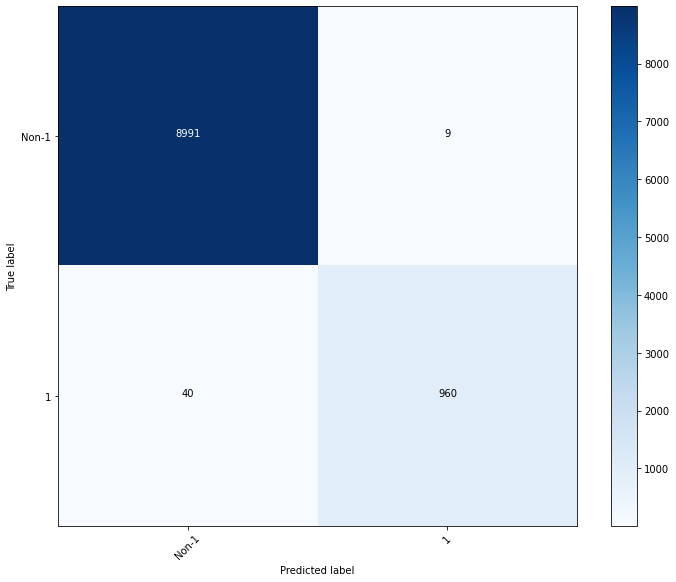

Confusion matrix for 2


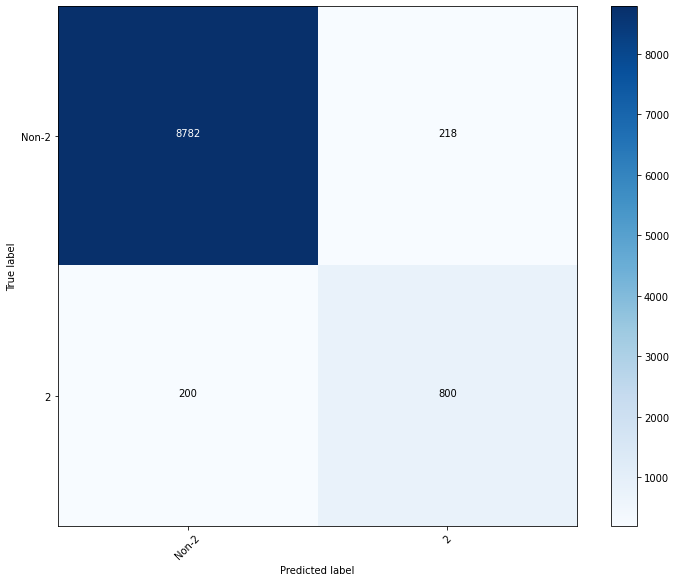

Confusion matrix for 3


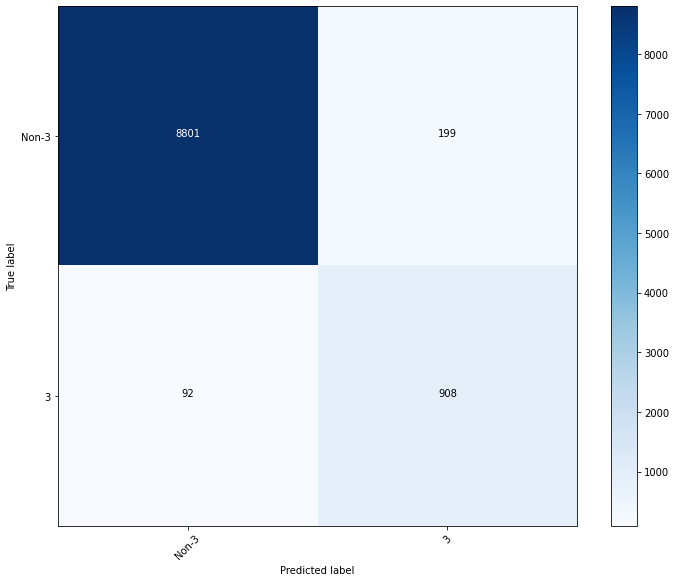

Confusion matrix for 4


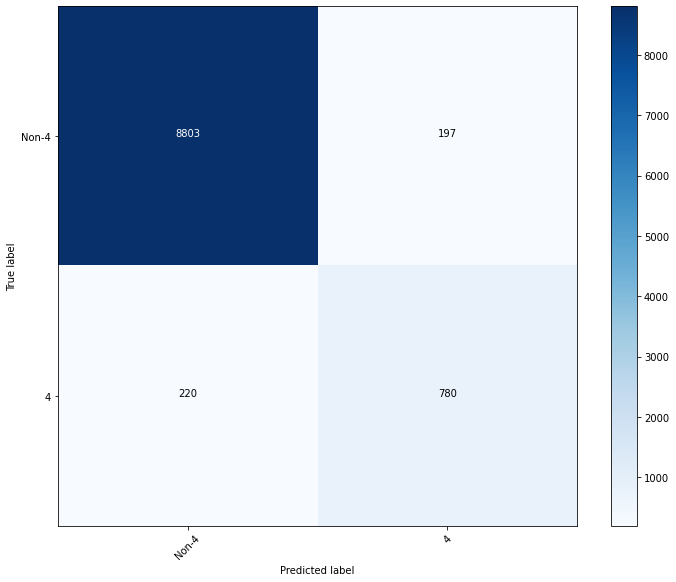

Confusion matrix for 5


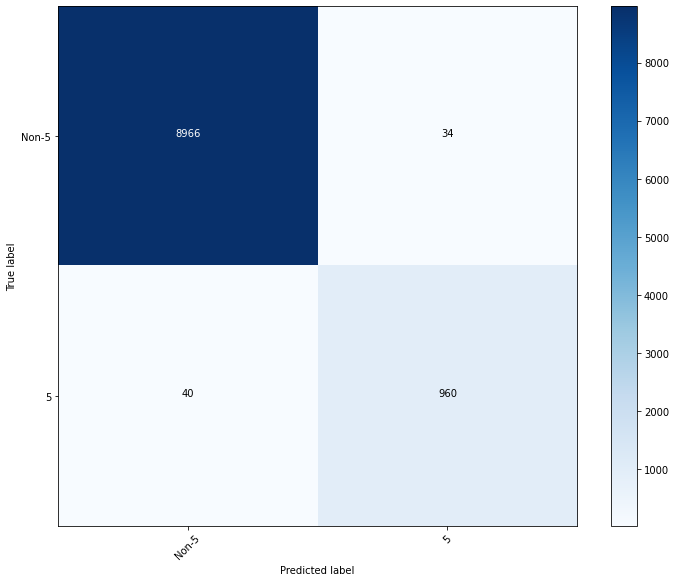

Confusion matrix for 6


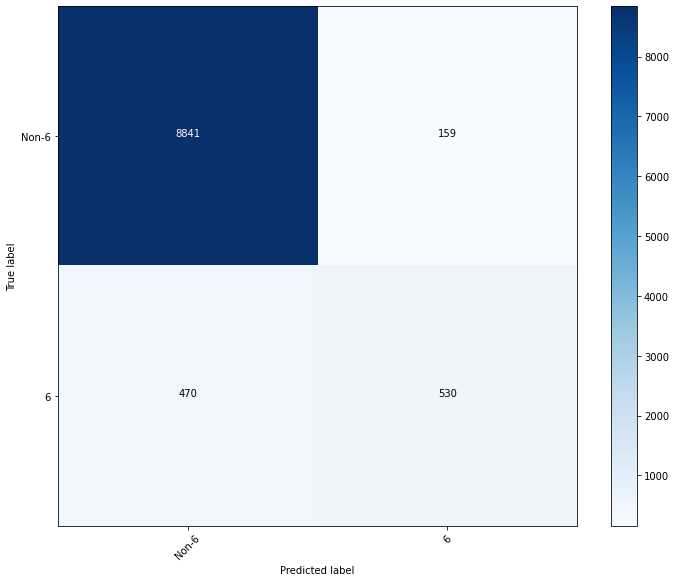

Confusion matrix for 7


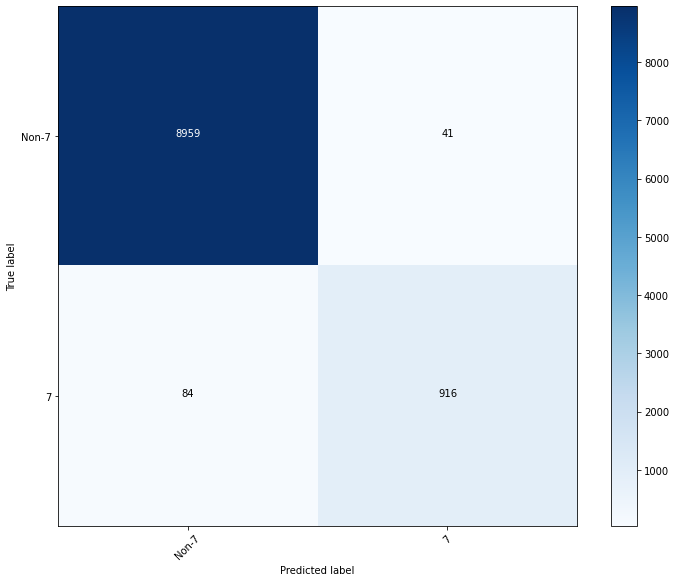

Confusion matrix for 8


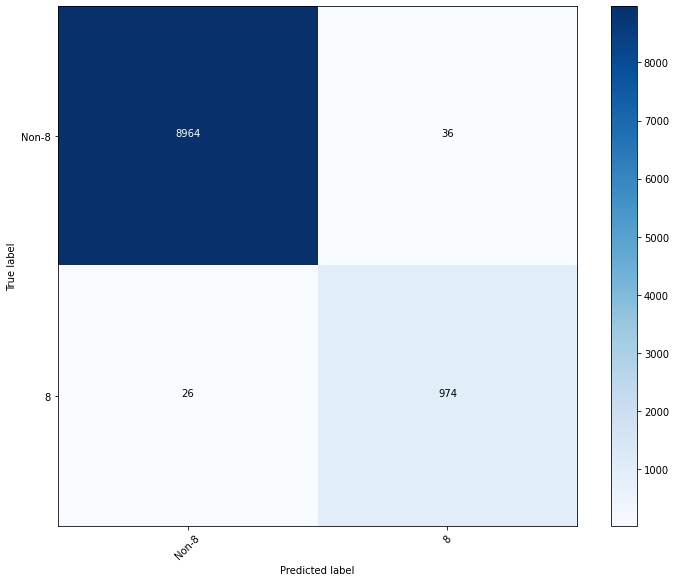

Confusion matrix for 9


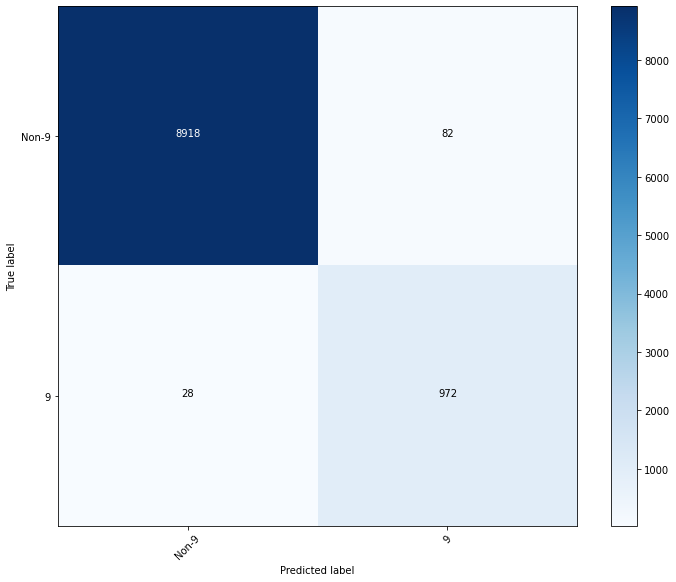

In [146]:
from itertools import product
from matplotlib import pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    print(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

for cls in set(y_pred_classes):
    cnf_matrix = confusion_matrix(y_test[:,cls], y_pred_int[:, cls])
    plt.figure(figsize=(10, 8))
    plot_confusion_matrix(cnf_matrix, 
                          classes=[f'Non-{cls}', f'{cls}'], 
                          title=f'Confusion matrix for {cls}')
    plt.show()
    

array([[8918,   82],
       [  28,  972]], dtype=int64)